# Activity 02 : Question 1

## Web References

- [Get started](https://igraph.org/python/#docs)
- [Tutorial](https://igraph.org/python/doc/tutorial/tutorial.html#selecting-vertices-and-edges)
- [GraphBase](https://igraph.org/python/doc/api/igraph._igraph.GraphBase.html#get_all_shortest_paths)
- [Graph Data Stucture](https://www.programiz.com/dsa/graph)
- [igraph Applications for Transportation Networks](https://www.viennar.org/blog/2016/08/24/igraph-applications-for-transportation-networks/)


## Import Libraries

In [107]:
import pandas as pd
import igraph as ig
from pprint import pprint

## Create Graph

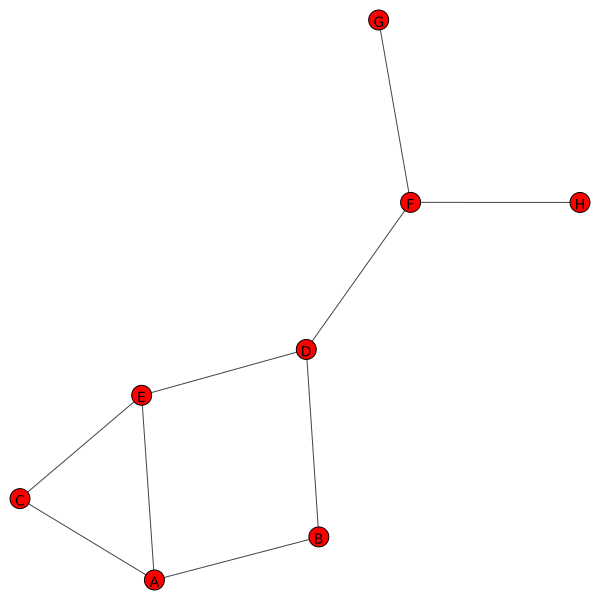

In [11]:
node_tuples = [
    ('A', 'B'),
    ('A', 'C'),
    ('A', 'E'),
    ('B', 'D'),
    ('C', 'E'),
    ('D', 'E'),
    ('D', 'F'),
    ('F', 'G'),
    ('F', 'H')
]

graph = ig.Graph.TupleList(node_tuples, directed=False)
ig.plot(graph, vertex_label=graph.vs["name"])


## Question 1: In this graph, what are the shortest paths from A to H?

In [47]:
paths = graph.get_all_shortest_paths(v='A', to='H')

for path in paths:
    print(path)
    for vertex in path:
        print(graph.vs[vertex]['name'], end ='')
    print('\n')



[0, 3, 4, 5, 7]
AEDFH

[0, 1, 4, 5, 7]
ABDFH



## Question 2: What is the edge betweenness of edge DF?

In [101]:
# get the shortest paths
paths = graph.get_all_shortest_paths(v='D', to='F')
for path in paths:
    print(path)
    for vertex in path:
        print(graph.vs[vertex]['name'], end ='')
    print('\n')

print(graph.edge_betweenness())

#graph.betweenness(vertices=['D', 'F'])
#graph.edge_connectivity(source=graph.vs.find("D").index, target=graph.vs.find("F").index)

[4, 5]
DF

[4.5, 2.0, 3.5, 6.5, 5.0, 10.5, 15.0, 7.0, 7.0]


In [138]:
betweenness = graph.edge_betweenness()
for i in range(0, len(graph.es)):
    print('{}{} {}'.format(
        graph.vs[ graph.es[i].tuple[0] ]['name'],
        graph.vs[ graph.es[i].tuple[1] ]['name'],
        betweenness[i]
        ))

AB 4.5
AC 2.0
AE 3.5
BD 6.5
CE 5.0
ED 10.5
DF 15.0
FG 7.0
FH 7.0


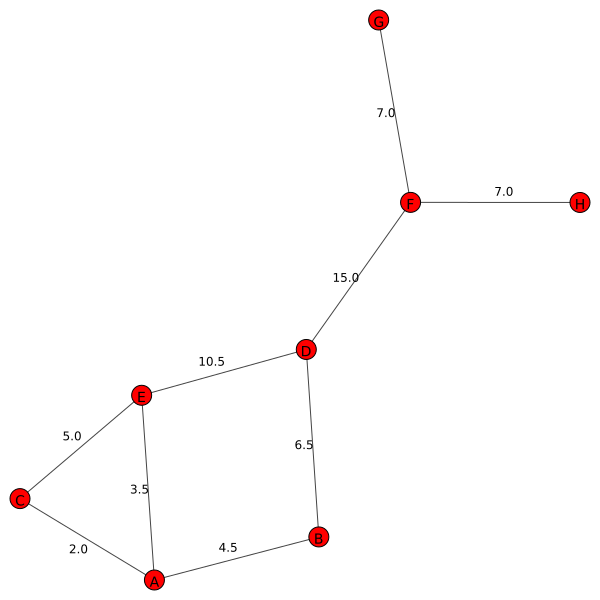

In [99]:
ig.plot(graph, vertex_label=graph.vs["name"], edge_label=graph.edge_betweenness())

## Question 3: 

In [143]:
graph.get_all_shortest_paths(v='A', to='E')
for path in paths:
    print(path)
    for vertex in path:
        print(graph.vs[vertex]['name'], end ='')
    print('\n')

[0, 3]
AE



In [144]:
betweenness = graph.edge_betweenness()
for i in range(0, len(graph.es)):
    print('{}{} {}'.format(
        graph.vs[ graph.es[i].tuple[0] ]['name'],
        graph.vs[ graph.es[i].tuple[1] ]['name'],
        betweenness[i]
        ))

AB 4.5
AC 2.0
AE 3.5
BD 6.5
CE 5.0
ED 10.5
DF 15.0
FG 7.0
FH 7.0


## Question 4: What is the edge betweenness of edge CE?

In [147]:
paths = graph.get_all_shortest_paths(v='C', to='E')
for path in paths:
    print(path)
    for vertex in path:
        print(graph.vs[vertex]['name'], end ='')
    print('\n')

[2, 3]
CE



## Part 4 

In [152]:
d = graph.community_edge_betweenness()
print(d)

Dendrogram, 8 elements, 7 merges

0 2 3 1 4 5 7 6
| | | | | | | |
| `-' `-' `-' |
|  |   |   |  |
`--'   |   `--'
 |     |    |  
 `-----'    |  
    |       |  
    `-------'


In [155]:
print(d.as_clustering(n=2))

Clustering with 8 elements and 2 clusters
[0] A, B, C, E, D
[1] F, G, H
